In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1
            
            # 　n_framesのループ終了
            
        # Add 3 to 7 moving squaresのループ終了
        if i % 100 == 0:
            print('n_samples : {}'.format(i))
            fig = plt.figure()
            ax = fig.add_subplot(1, 2, 1)
            noisy_image = noisy_movies[i].sum(axis=0).reshape(row, col)
            ax.imshow(noisy_image)
            ax = fig.add_subplot(1, 2, 2)
            shifted_image = shifted_movies[i].sum(axis=0).reshape(row, col)
            ax.imshow(noisy_image)
            plt.show()
        
    # n_samplesのループ終了
            
    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

n_samples : 0


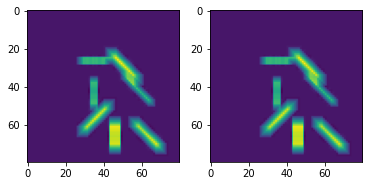

n_samples : 100


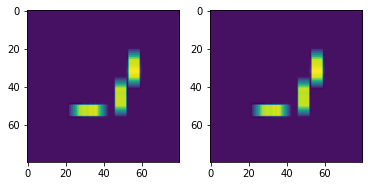

n_samples : 200


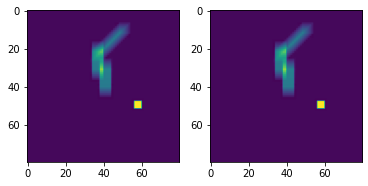

n_samples : 300


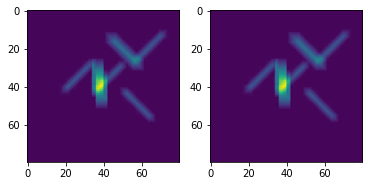

n_samples : 400


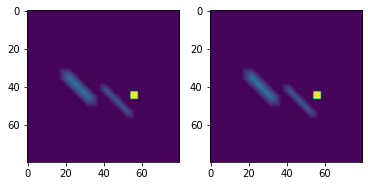

n_samples : 500


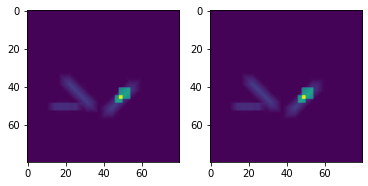

n_samples : 600


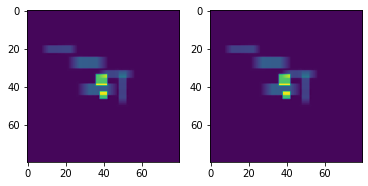

n_samples : 700


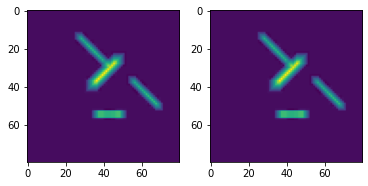

n_samples : 800


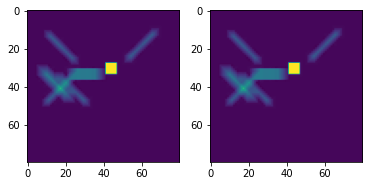

n_samples : 900


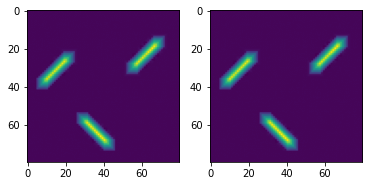

n_samples : 1000


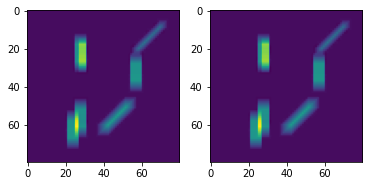

n_samples : 1100


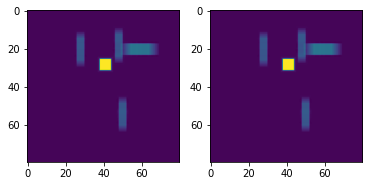

In [3]:
noisy_movies, shifted_movies = generate_movies()

In [4]:
noisy_movies.shape

(1200, 15, 40, 40, 1)

n_samples : 396
False


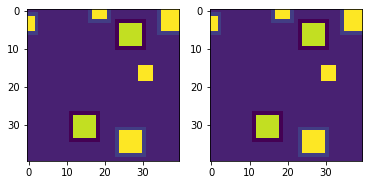

False


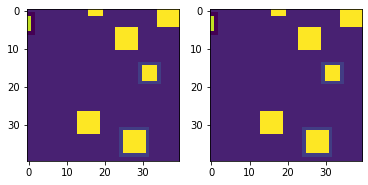

False


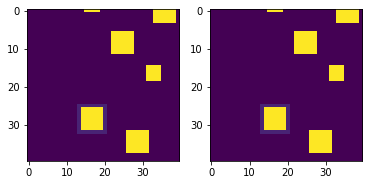

False


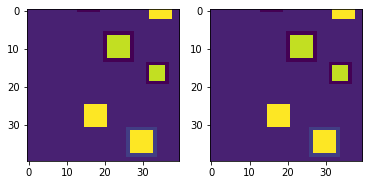

False


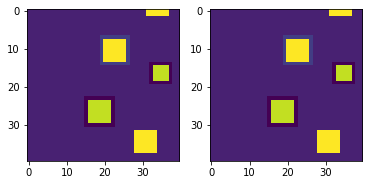

False


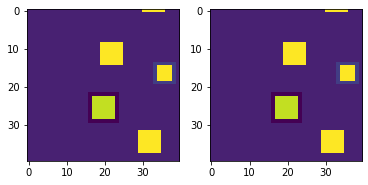

False


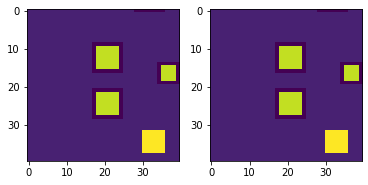

False


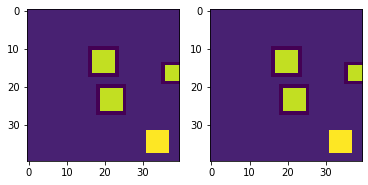

False


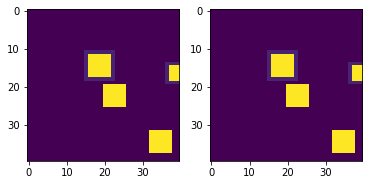

False


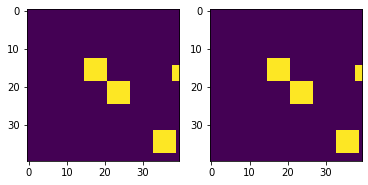

False


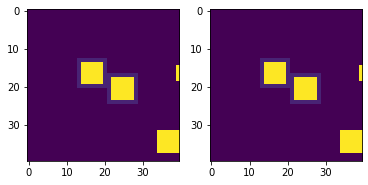

False


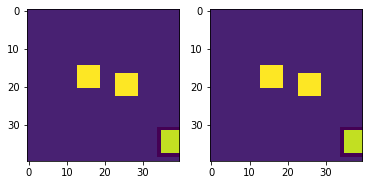

False


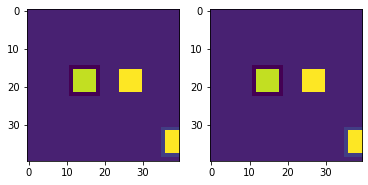

False


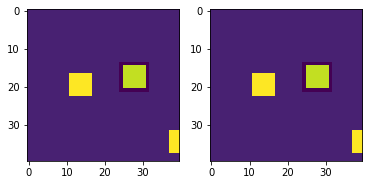

False


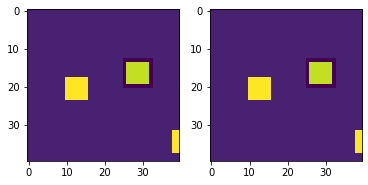

n_samples : 285
False


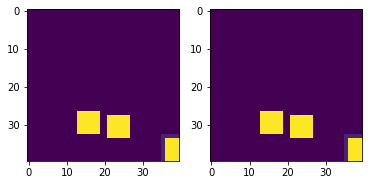

False


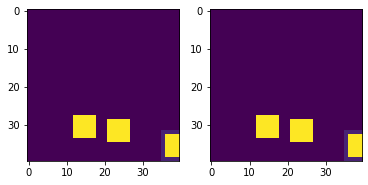

False


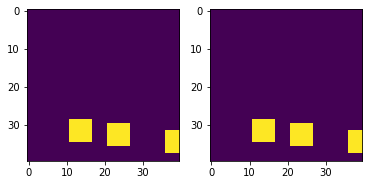

False


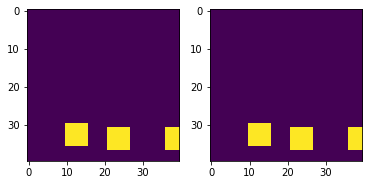

False


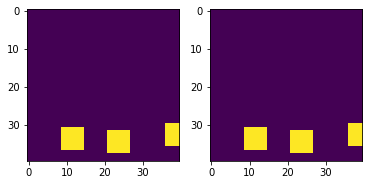

False


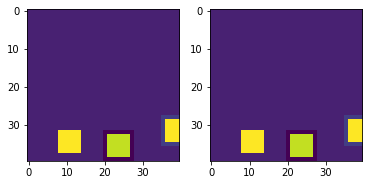

False


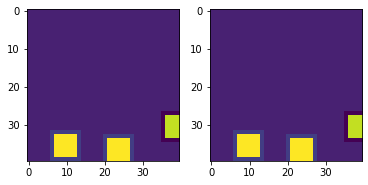

False


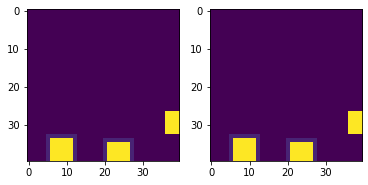

False


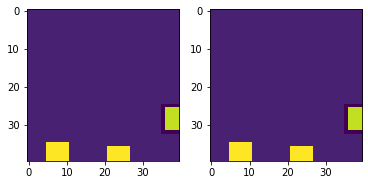

False


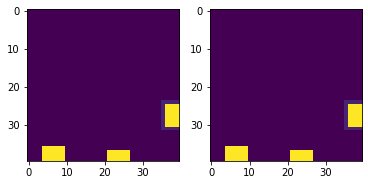

False


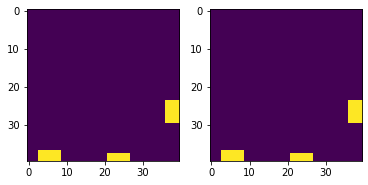

False


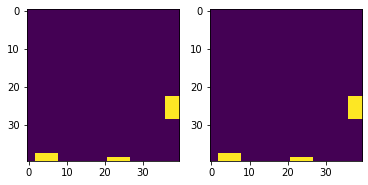

False


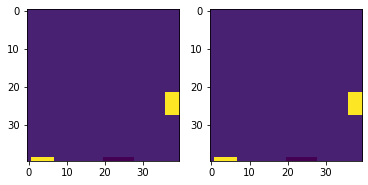

False


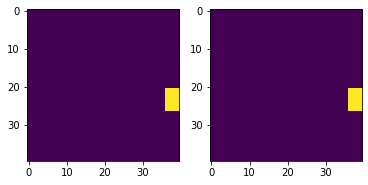

False


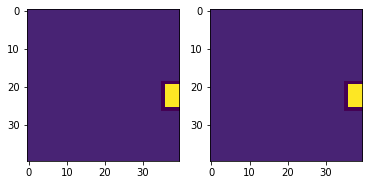

n_samples : 986
False


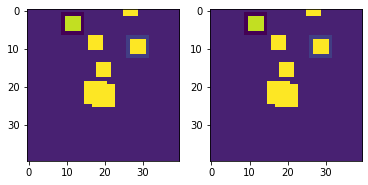

False


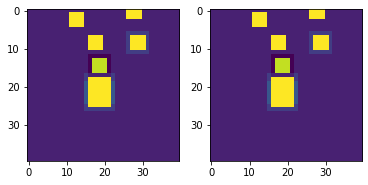

False


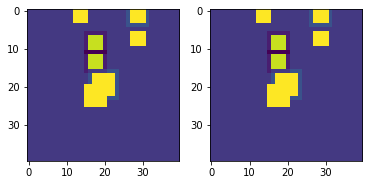

False


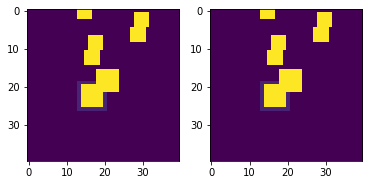

False


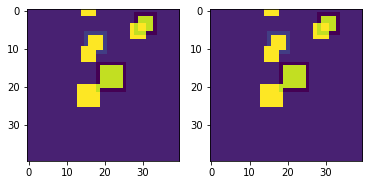

False


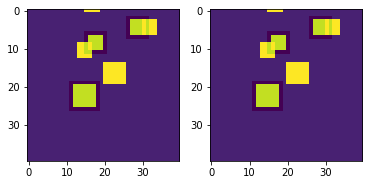

False


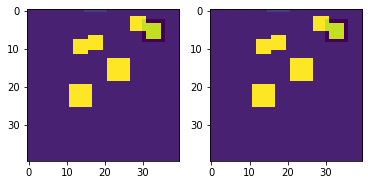

False


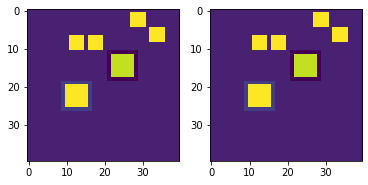

False


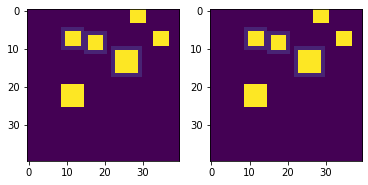

False


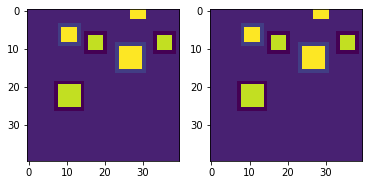

False


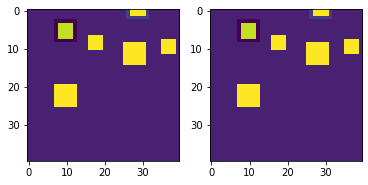

False


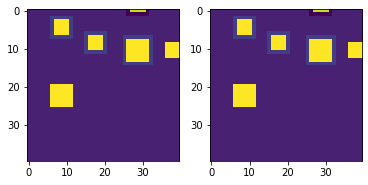

False


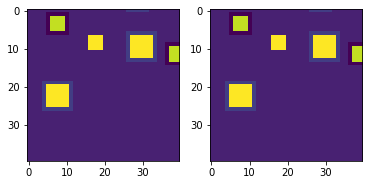

False


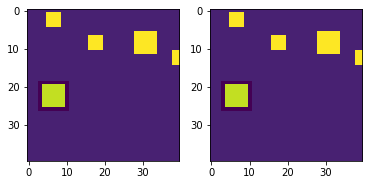

False


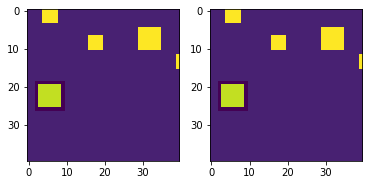

In [5]:
import time

i = 0
row, col = 40, 40
for i in np.random.randint(0, 1200, 3):
    print('n_samples : {}'.format(i))
    for j in range(15):
        fig = plt.figure()
        ax = fig.add_subplot(1, 2, 1)
        noisy_image = noisy_movies[i, j, ..., 0]
        ax.imshow(noisy_image)
        ax = fig.add_subplot(1, 2, 2)
        shifted_image = shifted_movies[i, j, ..., 0]
        ax.imshow(noisy_image)
        print(np.allclose(noisy_image, shifted_image))
        plt.show()
        time.sleep(0.3)